In [1]:
# import libray
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression, Ridge

warnings.filterwarnings("ignore")
%matplotlib inline

### **1. Data Preparation**

- Select only the features from list below and transform their names using the next line: data.columns = data.columns.str.replace(' ', '_').str.lower()
- Fill in the missing values of the selected features with 0
- Rename MSRP variable to price

For the rest of the homework, you'll need to use only these columns:

Make,
Model,
Year,
Engine HP,
Engine Cylinders,
Transmission Type,
Vehicle Style,
highway MPG,
city mpg,
MSRP


In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2023-10-03 01:14:49--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: 'data.csv.7'

     0K .......... .......... .......... .......... ..........  3% 1.08M 1s
    50K .......... .......... .......... .......... ..........  6% 1.85M 1s
   100K .......... .......... .......... .......... .......... 10% 1.18M 1s
   150K .......... .......... .......... .......... .......... 13% 2.11M 1s
   200K .......... .......... .......... .......... .......... 17% 1.98M 1s
   250K .......... .......... .......... .......... .......... 20% 3.21M 1s
   300K .......... .......... .......... .......... .......... 24% 1.45M 1s
   350K 

In [3]:
# load the dataset
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
print(f"There are {df.shape[1]} columns and {df.shape[0]} rows")

There are 16 columns and 11914 rows


In [5]:
# standarize columns by lower case and using underscore
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [6]:
# filter by the following columns
columns = ['make', 'model', 'year', 'engine_hp', 'engine_cylinders', 'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg', 'msrp']
df = df[columns]
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [7]:
# rename the msrp column to price
df.rename(columns={'msrp':'price'}, inplace=True)

In [8]:
# check the basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11845 non-null  float64
 4   engine_cylinders   11884 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   price              11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [9]:
print(f"There are {df.shape[1]} columns and {df.shape[0]} rows for the filtered dataset")

There are 10 columns and 11914 rows for the filtered dataset


In [10]:
# check the null values
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
price                 0
dtype: int64

In [11]:
# fill the null values with 0
df = df.fillna(0)
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
dtype: int64

In [12]:
# check the data type
df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
price                  int64
dtype: object

In [13]:
# define variables to distinguish categorical and numerical columns
categorical_columns = list(df.select_dtypes(include='object').columns)
numerical_columns = list(df.select_dtypes(include=['int64', 'float64']).columns)

# remove the price column from the numerical list
numerical_columns.remove('price')
numerical_columns

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [14]:
# check the number of unique value in categorical columns
df[categorical_columns].nunique()

make                  48
model                915
transmission_type      5
vehicle_style         16
dtype: int64

### **2. Explaratory Data Analysis**

- Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset
- Now we need to turn the price variable from numeric into a binary format.
- Let's create a variable above_average which is 1 if the price is above its mean value and 0 otherwise.

#### Question 1: What is the most frequent observation (mode) for the column transmission_type?

In [15]:
# check the summary statistics of the numerical columns
df.describe().round(2)

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
count,11914.00,11914.00,11914.00,11914.00,11914.00,11914.00
mean,2010.38,247.94,5.61,26.64,19.73,40594.74
std,7.58,110.51,1.80,8.86,8.99,60109.10
min,1990.00,0.00,0.00,12.00,7.00,2000.00
25%,2007.00,170.00,4.00,22.00,16.00,21000.00
50%,2015.00,225.00,6.00,26.00,18.00,29995.00
75%,2016.00,300.00,6.00,30.00,22.00,42231.25
max,2017.00,1001.00,16.00,354.00,137.00,2065902.00


In [16]:
# check the summary statistics of the categorical columns
df[categorical_columns].describe()

,make,model,transmission_type,vehicle_style
count,11914,11914,11914,11914
unique,48,915,5,16
top,Chevrolet,Silverado 1500,AUTOMATIC,Sedan
freq,1123,156,8266,3048


In [17]:
print(f"The most frequent observation for the column 'transmission_type': {df['transmission_type'].mode()[0]}")

The most frequent observation for the column 'transmission_type': AUTOMATIC


#### Question 2: What are the two features that have the biggest correlation in this dataset?

Text(0.5, 1.0, 'Correlation Matrix')

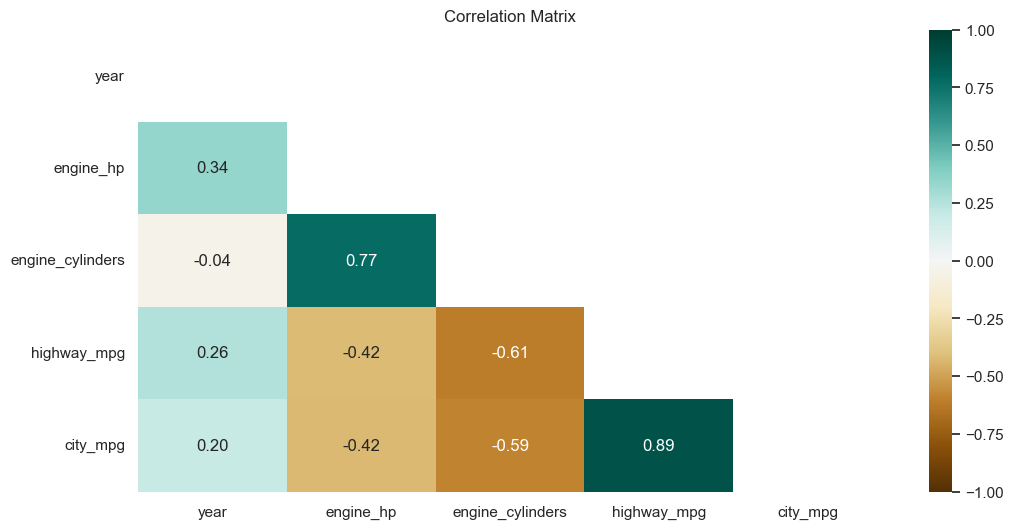

In [18]:
# create a correlation matrix graph
correlation_matrix = df[numerical_columns].corr()

# Set the style of the plot
sns.set(style="white")

# Create a mask to hide the upper triangle of the matrix (optional but recommended)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="BrBG", mask=mask, vmin=-1, vmax=1)

# Add a title
plt.title("Correlation Matrix")

In [19]:
print("The correlation graph shows that highway_mpg and city_mpg are the two features that have the biggest correlation")

The correlation graph shows that highway_mpg and city_mpg are the two features that have the biggest correlation


Text(0.5, 1.0, 'Distribution of Price')

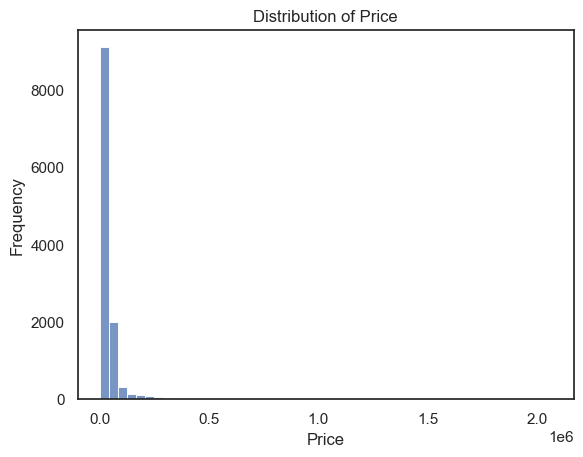

In [20]:
# visualize the distribution of price value using histogram
sns.histplot(df['price'], bins=50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')

In [21]:
# create a variable above_average which is 1 if the price is above its mean value and 0 otherwise
df['above_average'] = np.where(df['price'] > df['price'].mean(), 1, 0)
df[['price', 'above_average']].head()

,price,above_average
0,46135,1
1,40650,1
2,36350,0
3,29450,0
4,34500,0


### **3. Setting up the Validation Framework**

- Split your data in train/val/test sets with 60%/20%/20% distribution
- Use Scikit-Learn for that (the train_test_split function) and set the seed to 42
- Make sure that the target value (above_average) is not in your dataframe

In [22]:
# Split the dataset in train/val/test sets with 60%/20%/20% distribution
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
# The test size uses 0.25 derived from 20%(val)/80%(full_train) since the validation distribution is 20% of full dataset
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42) 

In [23]:
print(f"Train distribution: {len(df_train)}")
print(f"Validation distribution: {len(df_val)}")
print(f"Test distribution: {len(df_test)}")
print(f"Total distribution: {len(df)}")

Train distribution: 7148
Validation distribution: 2383
Test distribution: 2383
Total distribution: 11914


In [24]:
df_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
3972,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15,33599,0
1997,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17,26245,0
5216,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12,248000,1
2805,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Crew Cab Pickup,27,20,24990,0
11369,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,4dr Hatchback,26,20,20475,0


In [25]:
# reset the index of datasets
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

### **4. Feature Importance: Mutual Information**

- Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only
- Round the scores to 2 decimals using round(score, 2)

Question 3: Which of these variables has the lowest mutual information score?

In [26]:
# define a mutual information score function to generate by Pandas Series
def mutual_info_price_score(series):
    return mutual_info_score(series, df_train['above_average'])

In [27]:
# calculate the mutual information score
mi_df = df_train[categorical_columns].apply(mutual_info_price_score).round(2)
mi_df.sort_values(ascending=False)

model                0.46
make                 0.24
vehicle_style        0.08
transmission_type    0.02
dtype: float64

In [28]:
print("transmission_type has the lowest mutual information score")

transmission_type has the lowest mutual information score


### **5. Logistic Regression**

Question 4: What accuracy did you get?
- Now let's train a logistic regression.
- Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
- Fit the model on the training dataset.
- To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters: model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [29]:
# extract the target values
y_train_log = df_train['above_average'].values
y_val_log = df_val['above_average'].values
y_test_log = df_test['above_average'].values

In [30]:
# drop the target values from the datasets
df_train_log = df_train.drop(columns=['above_average','price'])
df_val_log = df_val.drop(columns=['above_average','price'])
df_test_log = df_test.drop(columns=['above_average','price'])

In [31]:
# load the OneHotEncoder function
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [32]:
# Combine all datasets (train, validation, test)
combined_data = pd.concat([df_train_log, df_val_log, df_test_log], axis=0)

# Fit the OneHotEncoder on the combined dataset
ohe.fit(combined_data[categorical_columns].values)

# Transform each dataset using the fitted encoder
ohe_train = ohe.transform(df_train_log[categorical_columns].values)
ohe_val = ohe.transform(df_val_log[categorical_columns].values)
ohe_test = ohe.transform(df_test_log[categorical_columns].values)

# Stack the categorical columns with the numerical columns
X_train_log = np.column_stack([ohe_train, df_train_log[numerical_columns].values])
X_val_log = np.column_stack([ohe_val, df_val_log[numerical_columns].values])
X_test_log = np.column_stack([ohe_test, df_test_log[numerical_columns].values])

In [33]:
# check the shape of each X
X_train_log.shape, X_val_log.shape, X_test_log.shape

((7148, 989), (2383, 989), (2383, 989))

In [34]:
# fit the logistic regression model using the train dataset
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train_log, y_train_log)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [35]:
# use the model to predict the validation dataset
y_pred_val = model.predict_proba(X_val_log)[:, 1]

In [36]:
# set the decision limit for churn
churn_decision = (y_pred_val >= 0.5)

In [37]:
# create the prediction dataframe
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred_val.round(2)
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val_log
df_pred['correct'] = df_pred['prediction'] == df_pred['actual']
df_pred

,probability,prediction,actual,correct
0,0.00,0,0,True
1,1.00,1,1,True
2,0.00,0,0,True
3,0.26,0,0,True
4,0.00,0,0,True
...,...,...,...,...
2378,0.00,0,0,True
2379,0.00,0,0,True
2380,0.00,0,0,True
2381,0.99,1,1,True


In [38]:
# calculate the accuracy
df_pred['correct'].mean().round(2)

0.95

Question 5: Which of following feature has the smallest difference?
- Let's find the least useful feature using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature

In [39]:
features = ['year', 'engine_hp', 'transmission_type', 'city_mpg']
scores = {}

score_initial = (churn_decision == y_val_log).mean()

for f in features:
    # Copy the original dataframes to avoid altering them
    df_train_copy = df_train.copy()
    df_val_copy = df_val.copy()

    # Create a copy of numerical_columns and remove the current feature if it exists in the copy
    numerical_columns_copy = numerical_columns.copy()
    if f in numerical_columns_copy:
        numerical_columns_copy.remove(f)

    # Stack the categorical columns with the remaining numerical columns
    X_train_log = np.column_stack([ohe_train, df_train_copy[numerical_columns_copy].values])
    X_val_log = np.column_stack([ohe_val, df_val_copy[numerical_columns_copy].values])

    # Fit the logistic regression model without the current feature
    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train_log, y_train_log)

    # Use the model to predict the validation dataset
    y_pred_val = model.predict_proba(X_val_log)[:, 1]
    churn_decision = (y_pred_val >= 0.5)

    # Calculate the accuracy for the model without the current feature
    score = (churn_decision == y_val_log).mean()

    # Calculate the difference in accuracy
    score_difference = score_initial - score

    # Store the score difference in the dictionary
    scores[f] = score_difference

# Print the score differences for each feature
for feature, score_diff in scores.items():
    print(f"Feature: {feature}, Accuracy Difference: {score_diff}")

Feature: year, Accuracy Difference: -0.0016785564414603105
Feature: engine_hp, Accuracy Difference: 0.020981955518254325
Feature: transmission_type, Accuracy Difference: 0.0
Feature: city_mpg, Accuracy Difference: 0.0


Question 6: Which of following feature has the smallest difference?
- For this question, we'll see how to use a linear regression model from Scikit-Learn.
- We'll need to use the original column price. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model on the training data with a solver 'sag'. Set the seed to 42.
- This model also has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10].
- Round your RMSE scores to 3 decimal digits.
- Which of these alphas leads to the best RMSE on the validation set?

In [41]:
# extract the target values
y_train_lr = df_train['price'].values
y_val_lr = df_val['price'].values
y_test_lr = df_test['price'].values

In [42]:
# apply the logarithmic transformation
y_train_lr = np.log1p(y_train_lr)
y_val_lr = np.log1p(y_val_lr)
y_test_lr = np.log1p(y_test_lr)

In [43]:
# drop the target values from the datasets
df_train_lr = df_train.drop(columns=['price', 'above_average'])
df_val_lr = df_val.drop(columns=['price', 'above_average'])
df_test_lr = df_test.drop(columns=['price', 'above_average'])

In [44]:
# Combine all datasets (train, validation, test)
combined_data = pd.concat([df_train_lr, df_val_lr, df_test_lr], axis=0)

# Fit the OneHotEncoder on the combined dataset
ohe.fit(combined_data[categorical_columns].values)

# Transform each dataset using the fitted encoder
ohe_train = ohe.transform(df_train_lr[categorical_columns].values)
ohe_val = ohe.transform(df_val_lr[categorical_columns].values)
ohe_test = ohe.transform(df_test_lr[categorical_columns].values)

# Stack the categorical columns with the numerical columns
X_train_lr = np.column_stack([ohe_train, df_train_lr[numerical_columns].values])
X_val_lr = np.column_stack([ohe_val, df_val_lr[numerical_columns].values])
X_test_lr = np.column_stack([ohe_test, df_test_lr[numerical_columns].values])

In [45]:
# check the shape of each X
X_train_lr.shape, X_val_lr.shape, X_test_lr.shape

((7148, 989), (2383, 989), (2383, 989))

In [46]:
rmse_scores = {}
alphas = [0, 0.001, 0.1, 1, 10]

for alpha in alphas:
    # Fit the Ridge regression model on the training data
    ridge_model = Ridge(alpha=alpha, solver='sag', random_state=42)
    ridge_model.fit(X_train_lr, y_train_lr)
    
    # Predict on the validation set
    y_pred_lr = ridge_model.predict(X_val_lr)
    
    # Calculate RMSE and round to 3 decimal digits
    rmse = np.sqrt(mean_squared_error(y_pred_lr, y_val_lr))
    rmse_rounded = round(rmse, 3)
    
    # Store RMSE in the dictionary
    rmse_scores[alpha] = rmse_rounded

# Find the alpha with the best RMSE
best_alpha = min(rmse_scores, key=rmse_scores.get)
best_rmse = rmse_scores[best_alpha]

print("RMSE Scores:")
for alpha, rmse in rmse_scores.items():
    print(f"Alpha: {alpha}, RMSE: {rmse}")

print(f"\nBest Alpha: {best_alpha}, Best RMSE: {best_rmse}")

RMSE Scores:
Alpha: 0, RMSE: 0.487
Alpha: 0.001, RMSE: 0.487
Alpha: 0.1, RMSE: 0.487
Alpha: 1, RMSE: 0.487
Alpha: 10, RMSE: 0.487

Best Alpha: 0, Best RMSE: 0.487


In [47]:
# use only numerical columns
X_train_lr = df_train_lr[numerical_columns].values
X_val_lr = df_val_lr[numerical_columns].values
X_test_lr = df_test_lr[numerical_columns].values

In [48]:
# numerical columns only
rmse_scores = {}
alphas = [0, 0.001, 0.1, 1, 10]

for alpha in alphas:
    # Fit the Ridge regression model on the training data
    ridge_model = Ridge(alpha=alpha, solver='sag', random_state=42)
    ridge_model.fit(X_train_lr, y_train_lr)
    
    # Predict on the validation set
    y_pred_lr = ridge_model.predict(X_val_lr)
    
    # Calculate RMSE and round to 3 decimal digits
    rmse = np.sqrt(mean_squared_error(y_pred_lr, y_val_lr))
    rmse_rounded = round(rmse, 3)
    
    # Store RMSE in the dictionary
    rmse_scores[alpha] = rmse_rounded

# Find the alpha with the best RMSE
best_alpha = min(rmse_scores, key=rmse_scores.get)
best_rmse = rmse_scores[best_alpha]

print("RMSE Scores:")
for alpha, rmse in rmse_scores.items():
    print(f"Alpha: {alpha}, RMSE: {rmse}")

print(f"\nBest Alpha: {best_alpha}, Best RMSE: {best_rmse}")

RMSE Scores:
Alpha: 0, RMSE: 0.527
Alpha: 0.001, RMSE: 0.527
Alpha: 0.1, RMSE: 0.527
Alpha: 1, RMSE: 0.527
Alpha: 10, RMSE: 0.527

Best Alpha: 0, Best RMSE: 0.527
